In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root = './data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset,batch_size = batch_size, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np



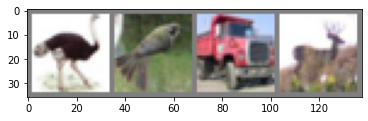

bird  bird  truck deer 


In [ ]:
def imshow(img):
  img = img / 2+0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()
# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader) # 이렇게 정의해 두고(즉 데이터를 가져오는 방법을 정의)
images, labels = next(dataiter) # 를 실행하면 다음 batch가 나옴
# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

conv2d의 in_channels는 r,g,b 3가지를, out_channel은 필터를 거친 결과값을, kernel은 kernel을 의미한다.

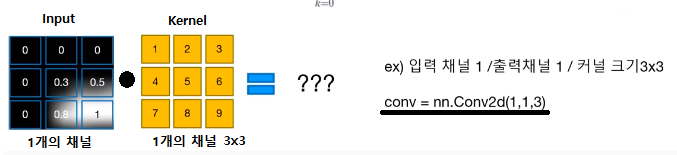

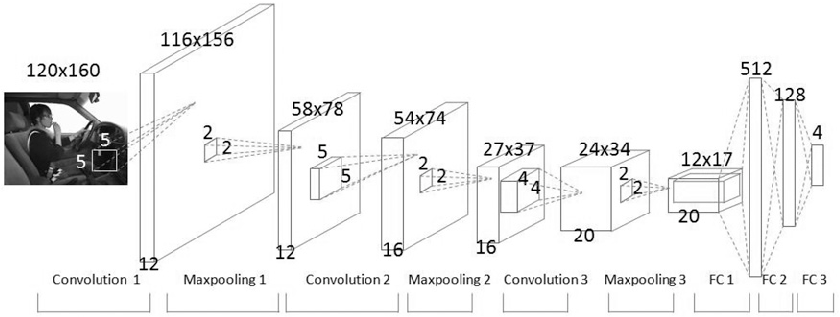

torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    #inchannel 3, out, 6 kernel 5x5
    self.conv1 = nn.Conv2d(3,6,5)
    #kernel이 2, 스트라이드가 2
    #책보면서 cnn공부좀 해야 할듯
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x =self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x,1) #배치를 제외한 모든 차원을 평평하게 한다.
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()





In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [ ]:
for epoch in range(2):
  running_loss = 0.0

  for i, data in enumerate(trainloader,0):
    inputs,labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
       print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
       running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.079
[1,  4000] loss: 1.988
[1,  6000] loss: 1.968
[1,  8000] loss: 1.953
[1, 10000] loss: 1.977
[1, 12000] loss: 1.999
[2,  2000] loss: 1.973
[2,  4000] loss: 1.998
[2,  6000] loss: 2.016
[2,  8000] loss: 2.036
[2, 10000] loss: 2.003
[2, 12000] loss: 2.055
Finished Training


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

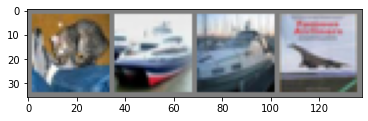

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images,labels = next(dataiter)

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>